In [46]:
import pandas as pd
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

In [47]:
kolom = ['favorite_color', 'favorite_music', 'favorite_beverage', 'favorite_soft_drink', 'gender']
jenis_kelamin = pd.read_csv('gender_classification.csv', names = kolom)
jenis_kelamin

,favorite_color,favorite_music,favorite_beverage,favorite_soft_drink,gender
0,Warm,Electronic,Wine,Coca Cola/Pepsi,F
1,Cool,Rock,Beer,Coca Cola/Pepsi,F
2,Warm,Jazz/Blues,Wine,Coca Cola/Pepsi,F
3,Cool,Pop,Wine,7UP/Sprite,F
4,Cool,Rock,Other,Coca Cola/Pepsi,F
5,Cool,Rock,Other,Coca Cola/Pepsi,F
6,Cool,Pop,Doesn't drink,7UP/Sprite,F
7,Cool,Pop,Beer,Fanta,F
8,Warm,Jazz/Blues,Whiskey,Fanta,F
9,Cool,Rock,Vodka,Coca Cola/Pepsi,F


In [48]:
jenis_kelamin.head()

,favorite_color,favorite_music,favorite_beverage,favorite_soft_drink,gender
0,Warm,Electronic,Wine,Coca Cola/Pepsi,F
1,Cool,Rock,Beer,Coca Cola/Pepsi,F
2,Warm,Jazz/Blues,Wine,Coca Cola/Pepsi,F
3,Cool,Pop,Wine,7UP/Sprite,F
4,Cool,Rock,Other,Coca Cola/Pepsi,F


In [49]:
fitur = ['favorite_color', 'favorite_music', 'favorite_beverage', 'favorite_soft_drink']
x = jenis_kelamin[fitur]
x

,favorite_color,favorite_music,favorite_beverage,favorite_soft_drink
0,Warm,Electronic,Wine,Coca Cola/Pepsi
1,Cool,Rock,Beer,Coca Cola/Pepsi
2,Warm,Jazz/Blues,Wine,Coca Cola/Pepsi
3,Cool,Pop,Wine,7UP/Sprite
4,Cool,Rock,Other,Coca Cola/Pepsi
5,Cool,Rock,Other,Coca Cola/Pepsi
6,Cool,Pop,Doesn't drink,7UP/Sprite
7,Cool,Pop,Beer,Fanta
8,Warm,Jazz/Blues,Whiskey,Fanta
9,Cool,Rock,Vodka,Coca Cola/Pepsi


In [50]:
# Male : M || Female : F
y = jenis_kelamin['gender']
y

0     F
1     F
2     F
3     F
4     F
5     F
6     F
7     F
8     F
9     F
10    M
11    M
12    M
13    M
14    M
15    M
16    M
17    M
18    M
19    M
Name: gender, dtype: object

In [51]:
le = preprocessing.LabelEncoder()

x.favorite_color = le.fit_transform(x.favorite_color)

x.favorite_music = le.fit_transform(x.favorite_music)

x.favorite_beverage = le.fit_transform(x.favorite_beverage)

x.favorite_soft_drink = le.fit_transform(x.favorite_soft_drink)

C:\Users\Asus\AppData\Local\Temp\ipykernel_7652\3850374110.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.favorite_color = le.fit_transform(x.favorite_color)
C:\Users\Asus\AppData\Local\Temp\ipykernel_7652\3850374110.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.favorite_music = le.fit_transform(x.favorite_music)
C:\Users\Asus\AppData\Local\Temp\ipykernel_7652\3850374110.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [52]:
x

,favorite_color,favorite_music,favorite_beverage,favorite_soft_drink
0,2,0,5,1
1,0,5,0,1
2,2,2,5,1
3,0,3,5,0
4,0,5,2,1
5,0,5,2,1
6,0,3,1,0
7,0,3,0,2
8,2,2,4,2
9,0,5,3,1


In [53]:
clf = DecisionTreeClassifier(criterion = "entropy")

In [54]:
clf = clf.fit(x,y)

In [59]:
test_pred = clf.predict([[3, 2, 5, 2]])
print("hasil prediksi = ", test_pred)

hasil prediksi =  ['F']


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [60]:
test_pred2 = clf.predict([[1, 3, 1, 0]])
print("hasil prediksi = ", test_pred2)

hasil prediksi =  ['M']


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


|--- favorite_color <= 0.50
|   |--- favorite_beverage <= 1.50
|   |   |--- class: F
|   |--- favorite_beverage >  1.50
|   |   |--- favorite_soft_drink <= 1.50
|   |   |   |--- favorite_beverage <= 2.50
|   |   |   |   |--- class: F
|   |   |   |--- favorite_beverage >  2.50
|   |   |   |   |--- favorite_beverage <= 4.00
|   |   |   |   |   |--- class: F
|   |   |   |   |--- favorite_beverage >  4.00
|   |   |   |   |   |--- class: F
|   |   |--- favorite_soft_drink >  1.50
|   |   |   |--- class: M
|--- favorite_color >  0.50
|   |--- favorite_beverage <= 3.50
|   |   |--- class: M
|   |--- favorite_beverage >  3.50
|   |   |--- favorite_music <= 3.00
|   |   |   |--- class: F
|   |   |--- favorite_music >  3.00
|   |   |   |--- class: M



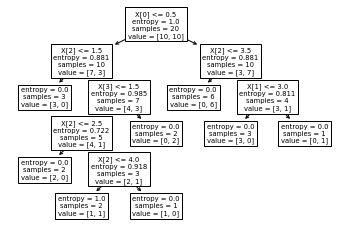

In [56]:
tree.plot_tree(clf.fit(x,y))
r = tree.export_text(clf, feature_names = fitur)
print(r)

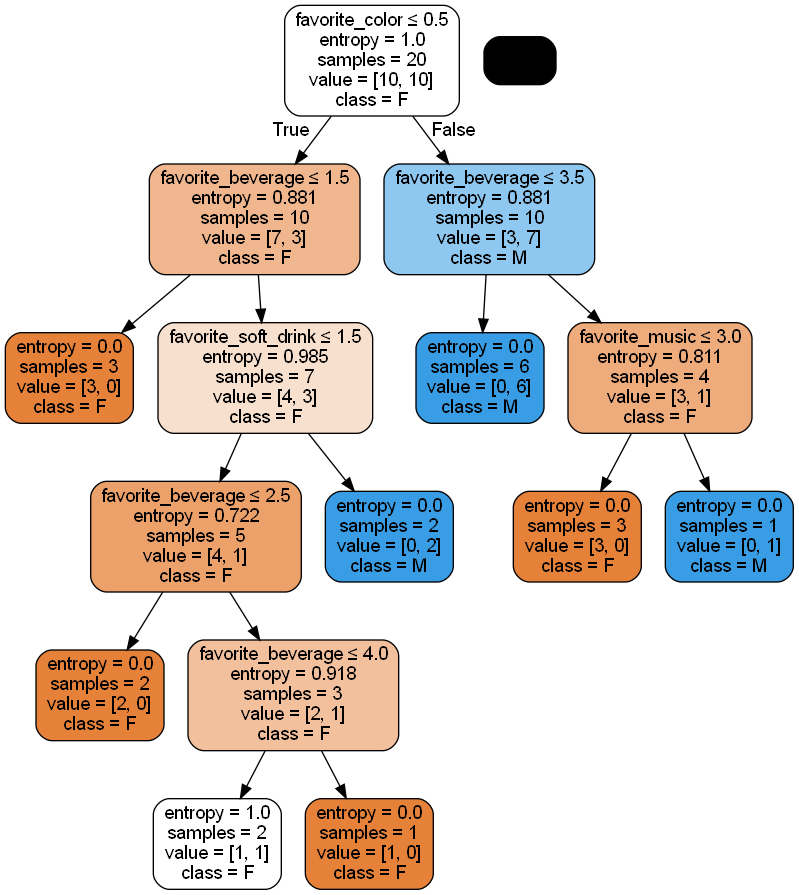

In [58]:
dot_data = StringIO()
export_graphviz(clf, out_file = dot_data, filled = True, rounded = True, special_characters = True,
               feature_names = fitur, class_names = ['F', 'M'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('D://jenis_kelamin.png')
Image('D://jenis_kelamin.png')